In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
import xgboost
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import joblib
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None) # to see all the rows
pd.set_option('display.max_columns', None) # to see all the columns

# Importing and Exploring Dataset

In [6]:
Google_Ads=pd.read_csv('Googleads.csv',sep='	')
Google_Ads

,campaign_id,campaign_name,ad_group_name,campaign_start_date,campaign_end_date,average_cost,average_cpc,average_cpe,average_cpm,average_cpv,clicks,conversions,ctr,cost_per_conversion,engagement_rate,interactions,impressions,bounce_rate
0,100100,SB__XYZ_MSME_Loans_Popular_PinCodes,Fast,12-02-2021,30/12/2037,2.594000e+07,2.594000e+07,0.000000e+00,2.594000e+09,0,3,0.000000,0.100000,0.000000e+00,0.000000,3,30,0
1,100200,SB__XYZ_MSME_Loans_Priority_PinCodes,MSME,27/02/2021,30/12/2037,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0.000000,0.000000,0.000000e+00,0.000000,0,5,0
2,100300,SB__XYZ_MSME_Loans_Priority_PinCodes,Small Business,27/02/2021,30/12/2037,2.670000e+07,2.670000e+07,0.000000e+00,1.335000e+10,0,1,0.000000,0.500000,0.000000e+00,0.000000,1,2,0
3,100400,SB__XYZ_MSME_Loans_Priority_PinCodes,Eligibility,27/02/2021,30/12/2037,1.910000e+07,1.910000e+07,0.000000e+00,9.550000e+09,0,1,0.000000,0.500000,0.000000e+00,0.000000,1,2,0
4,100500,SB__XYZ_MSME_Loans_Priority_PinCodes,Apply,27/02/2021,30/12/2037,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0.000000,0.000000,0.000000e+00,0.000000,0,1,0
5,100600,SB__XYZ_Brand_Popular_PinCodes,Brand,05-02-2021,30/12/2037,1.196167e+07,1.196167e+07,0.000000e+00,2.729698e+09,0,390,50.935713,0.228204,9.158708e+07,0.000000,390,1709,0
6,100700,SB__XYZ_MSME_Loans_Popular_PinCodes,Apply,12-02-2021,30/12/2037,3.257549e+07,3.257549e+07,0.000000e+00,6.184118e+09,0,71,5.800000,0.189840,3.987690e+08,0.000000,71,374,0
7,100800,SB__XYZ_MSME_Loans_Popular_PinCodes,Collateral,12-02-2021,30/12/2037,2.292000e+07,2.292000e+07,0.000000e+00,3.618947e+09,0,24,5.000000,0.157895,1.100160e+08,0.000000,24,152,0
8,100900,SB__XYZ_Brand_Unpopular_Priority_PinCodes,Finance,12-02-2021,30/12/2037,1.932182e+07,1.932182e+07,0.000000e+00,4.723111e+09,0,11,1.000000,0.244444,2.125400e+08,0.000000,11,45,0
9,101000,SB__XYZ_Priority_PinCodes_CI_MSME_Discovery,CI MSME,27/02/2021,30/12/2037,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0.000000,0.000000,0.000000e+00,0.000000,0,8,0


Deatails

In [7]:
Google_Ads.shape

(133, 18)

In [8]:
Google_Ads.dtypes

campaign_id              int64
campaign_name           object
ad_group_name           object
campaign_start_date     object
campaign_end_date       object
average_cost           float64
average_cpc            float64
average_cpe            float64
average_cpm            float64
average_cpv              int64
clicks                   int64
conversions            float64
ctr                    float64
cost_per_conversion    float64
engagement_rate        float64
interactions             int64
impressions              int64
bounce_rate              int64
dtype: object

In [9]:
Google_Ads.isnull().sum()

campaign_id            0
campaign_name          0
ad_group_name          0
campaign_start_date    0
campaign_end_date      0
average_cost           0
average_cpc            0
average_cpe            0
average_cpm            0
average_cpv            0
clicks                 0
conversions            0
ctr                    0
cost_per_conversion    0
engagement_rate        0
interactions           0
impressions            0
bounce_rate            0
dtype: int64

In [10]:
Google_Ads.columns

Index(['campaign_id', 'campaign_name', 'ad_group_name', 'campaign_start_date',
       'campaign_end_date', 'average_cost', 'average_cpc', 'average_cpe',
       'average_cpm', 'average_cpv', 'clicks', 'conversions', 'ctr',
       'cost_per_conversion', 'engagement_rate', 'interactions', 'impressions',
       'bounce_rate'],
      dtype='object')

In [11]:
Google_Ads.campaign_name.unique()

array(['SB__XYZ_MSME_Loans_Popular_PinCodes',
       'SB__XYZ_MSME_Loans_Priority_PinCodes',
       'SB__XYZ_Brand_Popular_PinCodes',
       'SB__XYZ_Brand_Unpopular_Priority_PinCodes',
       'SB__XYZ_Priority_PinCodes_CI_MSME_Discovery',
       'SB__XYZ_Brand_Priority_PinCodes',
       'SB__XYZ_Popular_PinCodes_BusinessLoans_Discovery',
       'SB__XYZ_UnPopular_PinCodes_CI_MSME_Discovery',
       'SB__XYZ_Priority_PinCodes_BusinessLoans_Discovery',
       'SB__XYZ_UnPopular_PinCodes_BusinessLoans_Discovery',
       'SB__XYZ_MSME_Loans_UnPopular_Priority_PinCodes',
       'SB__XYZ_Popular_PinCodes_CI_MSME_Discovery',
       'SB__XYZ_Business_Loans_Popular_PinCodes',
       'SB__XYZ_Business_Loans_UnPopular_Priority_PinCodes'], dtype=object)

In [12]:
Google_Ads.ad_group_name.unique()

array(['Fast', 'MSME', 'Small Business', 'Eligibility', 'Apply', 'Brand',
       'Collateral', 'Finance', 'CI MSME', 'In Market', 'Visage Holdings',
       'Startup', 'In Market_Without_CTA', 'Business Loans',
       'Fast_Business', 'Collateral_Business', 'Apply_Business',
       'Eligibility_Business'], dtype=object)

In [13]:
# We will extract day and month from the date of journey column , we will not extract year as this data is form only one year

In [14]:
# campaign_start_date get month from the corresponding 
#  column value
Google_Ads['Month-camp-start'] = pd.DatetimeIndex(Google_Ads['campaign_start_date']).month

In [15]:
# get day from the corresponding 
# Date_of _journey column value
Google_Ads['Day-camp-start'] = pd.DatetimeIndex(Google_Ads['campaign_start_date']).day

In [16]:
Google_Ads.head()

,campaign_id,campaign_name,ad_group_name,campaign_start_date,campaign_end_date,average_cost,average_cpc,average_cpe,average_cpm,average_cpv,clicks,conversions,ctr,cost_per_conversion,engagement_rate,interactions,impressions,bounce_rate,Month-camp-start,Day-camp-start
0,100100,SB__XYZ_MSME_Loans_Popular_PinCodes,Fast,12-02-2021,30/12/2037,25940000.0,25940000.0,0.0,2.594000e+09,0,3,0.0,0.1,0.0,0.0,3,30,0,12,2
1,100200,SB__XYZ_MSME_Loans_Priority_PinCodes,MSME,27/02/2021,30/12/2037,0.0,0.0,0.0,0.000000e+00,0,0,0.0,0.0,0.0,0.0,0,5,0,2,27
2,100300,SB__XYZ_MSME_Loans_Priority_PinCodes,Small Business,27/02/2021,30/12/2037,26700000.0,26700000.0,0.0,1.335000e+10,0,1,0.0,0.5,0.0,0.0,1,2,0,2,27
3,100400,SB__XYZ_MSME_Loans_Priority_PinCodes,Eligibility,27/02/2021,30/12/2037,19100000.0,19100000.0,0.0,9.550000e+09,0,1,0.0,0.5,0.0,0.0,1,2,0,2,27
4,100500,SB__XYZ_MSME_Loans_Priority_PinCodes,Apply,27/02/2021,30/12/2037,0.0,0.0,0.0,0.000000e+00,0,0,0.0,0.0,0.0,0.0,0,1,0,2,27


We will drop the columns campaign_start_date as we have got date and month

In [17]:
Google_Ads.drop('campaign_start_date',axis=1,inplace=True)

In [18]:
Google_Ads.head()

,campaign_id,campaign_name,ad_group_name,campaign_end_date,average_cost,average_cpc,average_cpe,average_cpm,average_cpv,clicks,conversions,ctr,cost_per_conversion,engagement_rate,interactions,impressions,bounce_rate,Month-camp-start,Day-camp-start
0,100100,SB__XYZ_MSME_Loans_Popular_PinCodes,Fast,30/12/2037,25940000.0,25940000.0,0.0,2.594000e+09,0,3,0.0,0.1,0.0,0.0,3,30,0,12,2
1,100200,SB__XYZ_MSME_Loans_Priority_PinCodes,MSME,30/12/2037,0.0,0.0,0.0,0.000000e+00,0,0,0.0,0.0,0.0,0.0,0,5,0,2,27
2,100300,SB__XYZ_MSME_Loans_Priority_PinCodes,Small Business,30/12/2037,26700000.0,26700000.0,0.0,1.335000e+10,0,1,0.0,0.5,0.0,0.0,1,2,0,2,27
3,100400,SB__XYZ_MSME_Loans_Priority_PinCodes,Eligibility,30/12/2037,19100000.0,19100000.0,0.0,9.550000e+09,0,1,0.0,0.5,0.0,0.0,1,2,0,2,27
4,100500,SB__XYZ_MSME_Loans_Priority_PinCodes,Apply,30/12/2037,0.0,0.0,0.0,0.000000e+00,0,0,0.0,0.0,0.0,0.0,0,1,0,2,27


# Exploratory Data Analysis

Univaraite Analysis

In [19]:
Google_Ads.columns


Index(['campaign_id', 'campaign_name', 'ad_group_name', 'campaign_end_date',
       'average_cost', 'average_cpc', 'average_cpe', 'average_cpm',
       'average_cpv', 'clicks', 'conversions', 'ctr', 'cost_per_conversion',
       'engagement_rate', 'interactions', 'impressions', 'bounce_rate',
       'Month-camp-start', 'Day-camp-start'],
      dtype='object')

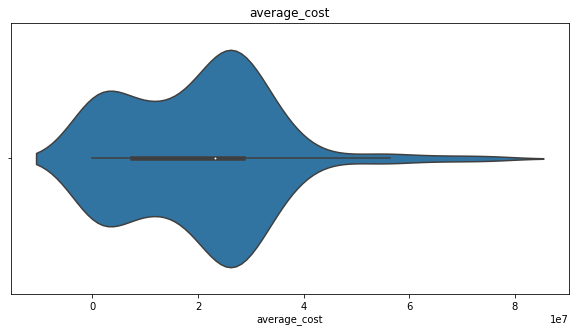

In [62]:
plt.figure(figsize=(10,5))
sns.violinplot(Google_Ads['average_cost'])
plt.title('Avergae cost per advertising')
plt.show()

In [ ]:
Average cost for advertising is high between 2X10^7 and 3X10^7.

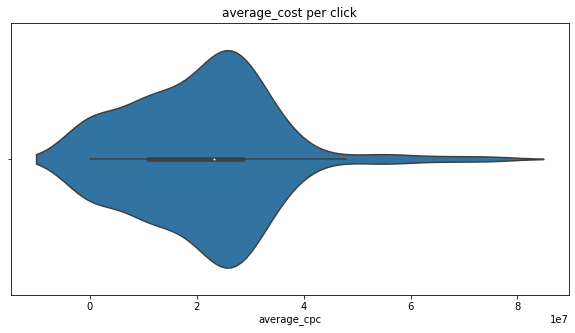

In [63]:
plt.figure(figsize=(10,5))
sns.violinplot(Google_Ads['average_cpc'])
plt.title('average_cost per click')
plt.show()

In [ ]:
Average cost per click is mostly between 2X10^7 and 3X10^7

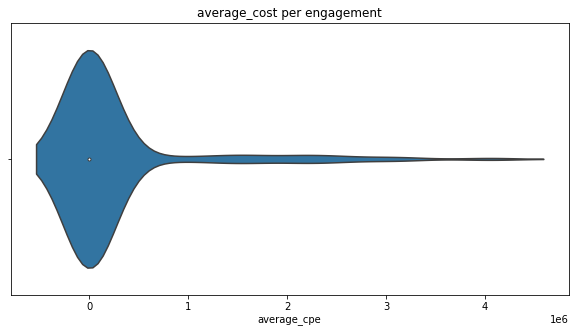

In [65]:
plt.figure(figsize=(10,5))
sns.violinplot(Google_Ads['average_cpe'])
plt.title('average_cost per engagement')
plt.show()

In [ ]:
Average cost per engagement very low and close to zero for most.

Details of the columns

1. Campaign_id - identification of Campaign (in number)
2. Campaign_name - name of the Campaign
3. Ad_group_name - name of the Ad Group
4. Campaign_start_date - Date when it started
5. Campaign_end_date - Date when it ended
6. Average_cost - in rupees, average cost of advertising
7. Average_cpc - in rupees, average cost per click
8. Average_cpe - in rupees, average cost per engagement
9. Average_cpm - in rupees, average cost per mile (1,000 impressions)
10. Average_cpv - in rupees, average cost per view
11. Clicks - # of total clicks (Note: we want to maximize Clicks)
12. Conversions - # of total conversion (Note: we want to maximize Conversions)
13. Ctr - Click through rate (Note: check here)
14. Cost_per_conversion - in rupees, cost per conversion
15. Engagement_rate - is the number of engagements that your ad receives divided by the
number of times your ad is shown (Note: for more: check here)
16. Interactions - # of interactions. (Note: for more check here)
17. Impressions - # of the times ad is shown (Note: for more information check here)
18. Bounce_rate - single-page sessions divided by all sessions (Note: for more information
check here)

# Bivariative Analysis

Text(0.5, 1.0, 'No. of Ad Group Name')

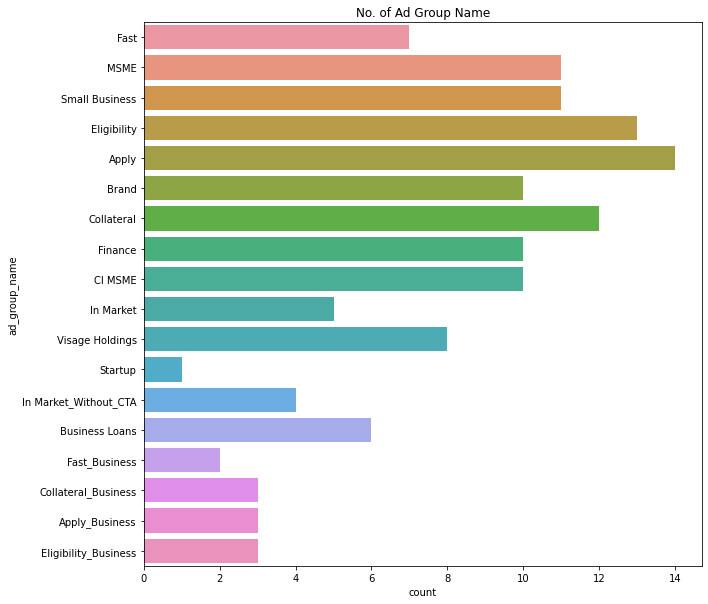

In [30]:
plt.figure(figsize=(10,10))
sns.countplot(y=Google_Ads['ad_group_name'])
plt.title('No. of Ad Group Name')

Apply, Eligiblity and collateral are the highest ad group.
Brand,Finance and CI MSME are the ad group with same count.
Start up and Fast Buisness ad groups are least.

Text(0.5, 1.0, 'No. of campaign names')

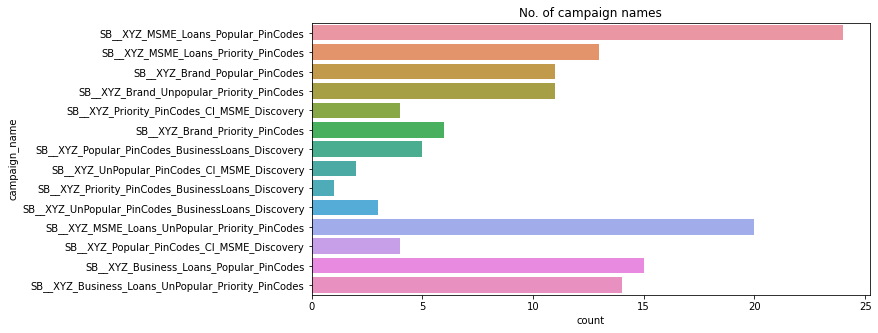

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(y=Google_Ads['campaign_name'])
plt.title('No. of campaign names')

SB_XYZ-MSME_Loans_Popular_Pincodes is the highest prefered campaign.

SB_XYZ_MSME_Loans_Unpopular_Priority_Pincodes is the second most prfered campaign.

SB_XYZ_Priority_Pincodes_BuisnessLoans_Discovery is the least prefered campaign.

Most of the campaign were started in the month of February.

SB_XYZ_MSME_Loans_Popular_pincodes ,SB_XYZ_Brand_Unpopular_priority_pincodes and SB_XYZ_Brand_Priority_Pincodes campaing were started in December Month.

SB_XYZ_Brand_popular_Pincodes was started in May 2021,SB_XYZ_Buisness_Loans_Popular_Pinocodes and SB_XYZ_Buisness_Loans_Unpopular_Priority_Pincodes were started in March 2021

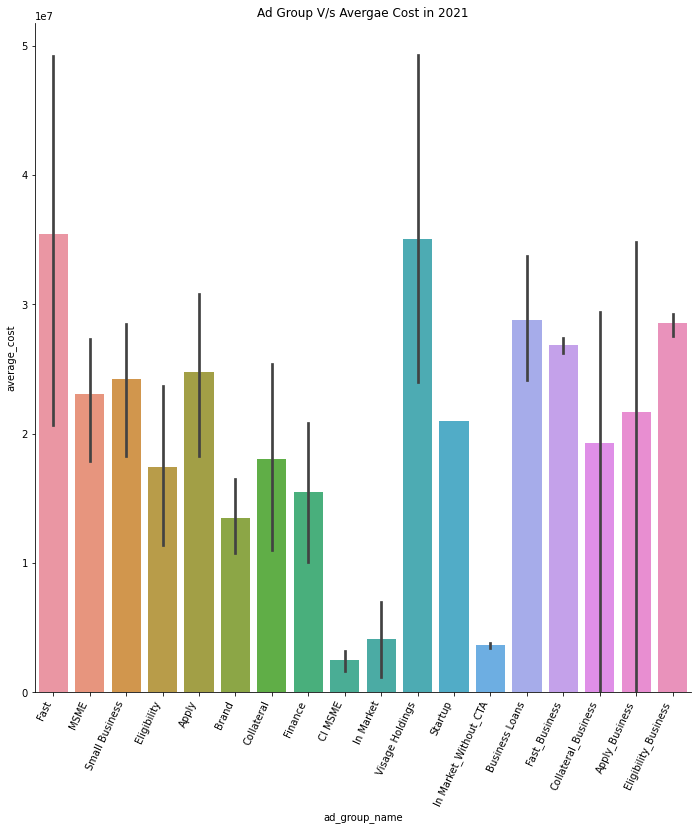

In [44]:
sns.catplot(x='ad_group_name',y='average_cost',data=Google_Ads,kind='bar',size=10)
plt.xticks(rotation=65, horizontalalignment='right')
plt.title('Ad Group V/s Avergae Cost in 2021')
plt.show()

Average cost for Fast and visage holdings is the highest.

Ad groups CI MSME,In Market and In MArket_without_CTA is the lowest.

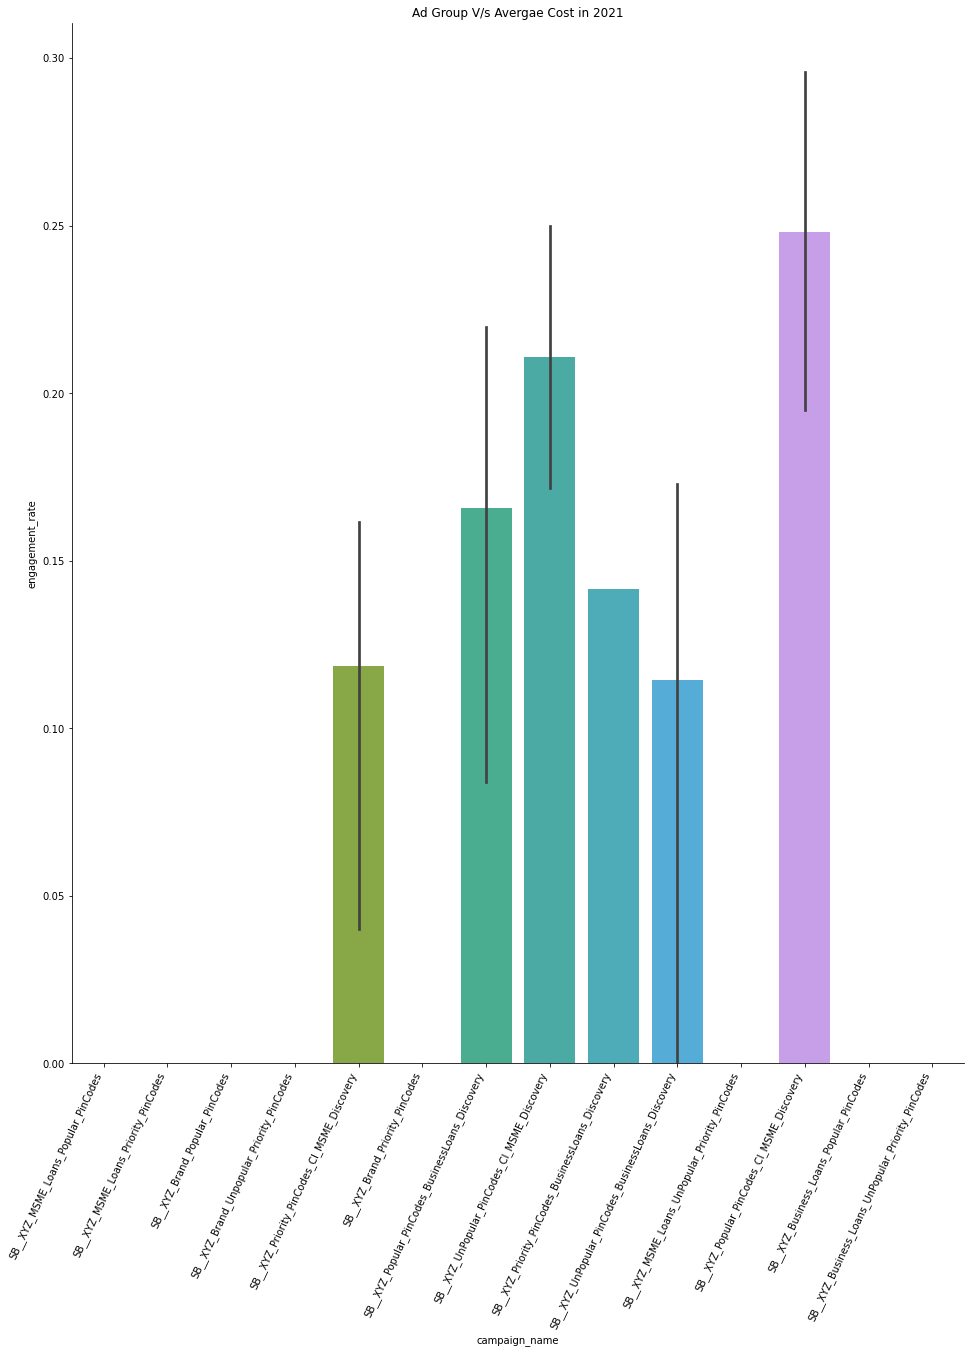

In [49]:
sns.catplot(y='engagement_rate',x='campaign_name',data=Google_Ads,kind='bar',size=15)
plt.xticks(rotation=65, horizontalalignment='right')
plt.title('Ad Group V/s Avergae Cost in 2021')
plt.show()

It is clear to us that only discovery campaign have the engag

SB_XYZ_Popular_Pincodes_CI_MSME_Discovery has highest engagement rate.

SB_XYZ_Unpopular_Pincodes_BuisnessLoans_Discovery has the least engagement rate.

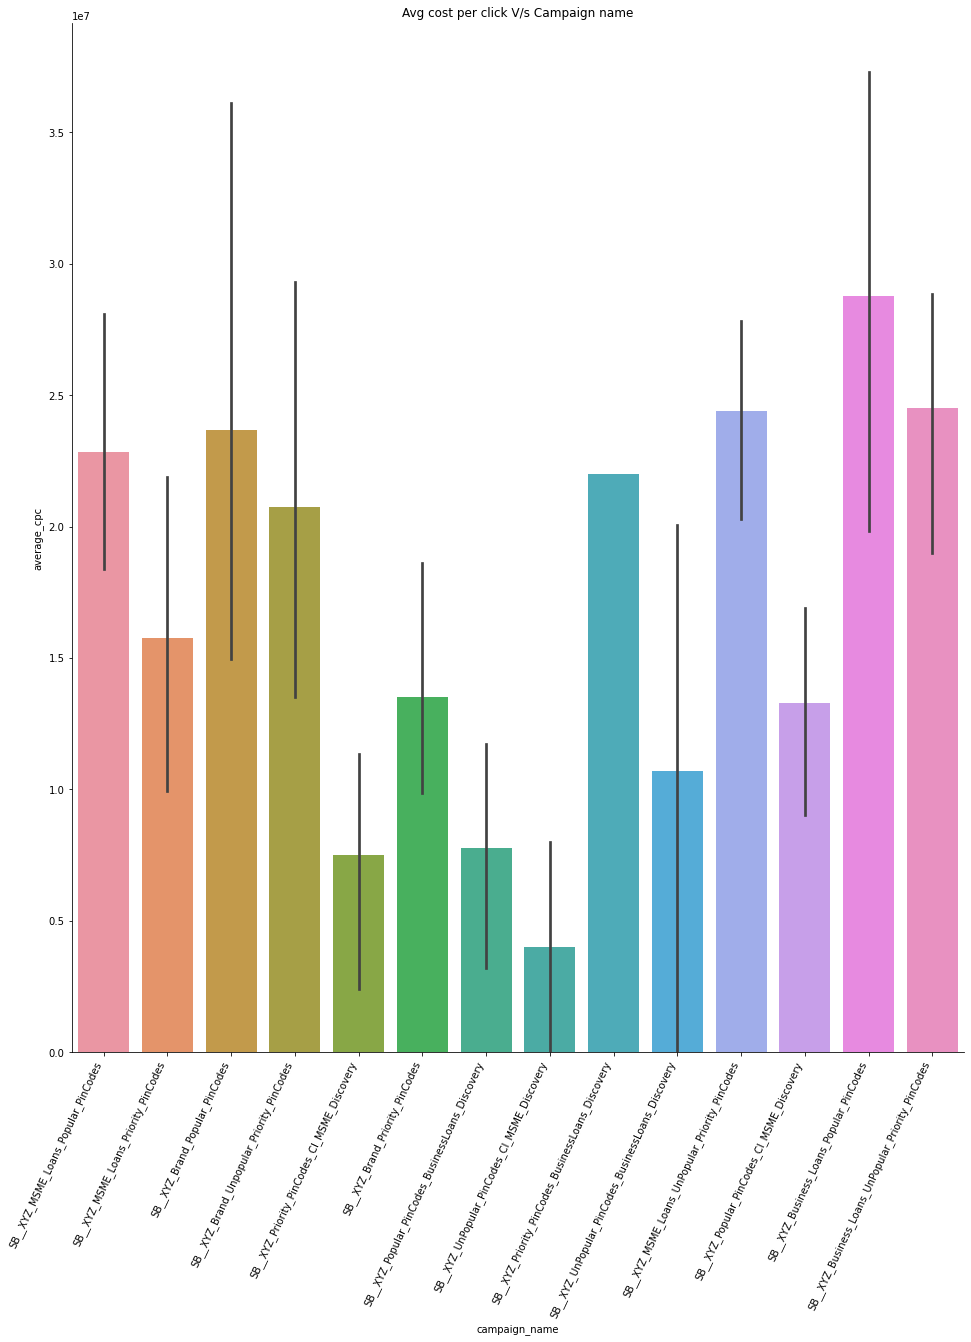

In [51]:
sns.catplot(y='average_cpc',x='campaign_name',data=Google_Ads,kind='bar',size=15)
plt.xticks(rotation=65, horizontalalignment='right')
plt.title('Avg cost per click V/s Campaign name')
plt.show()

Average cost per click is very low for SB_XYZ_Unpopular_Pincodes_CI_MSME_Discovery and very high for SB_XYZ_Buisness_Loans_popular_pincodes

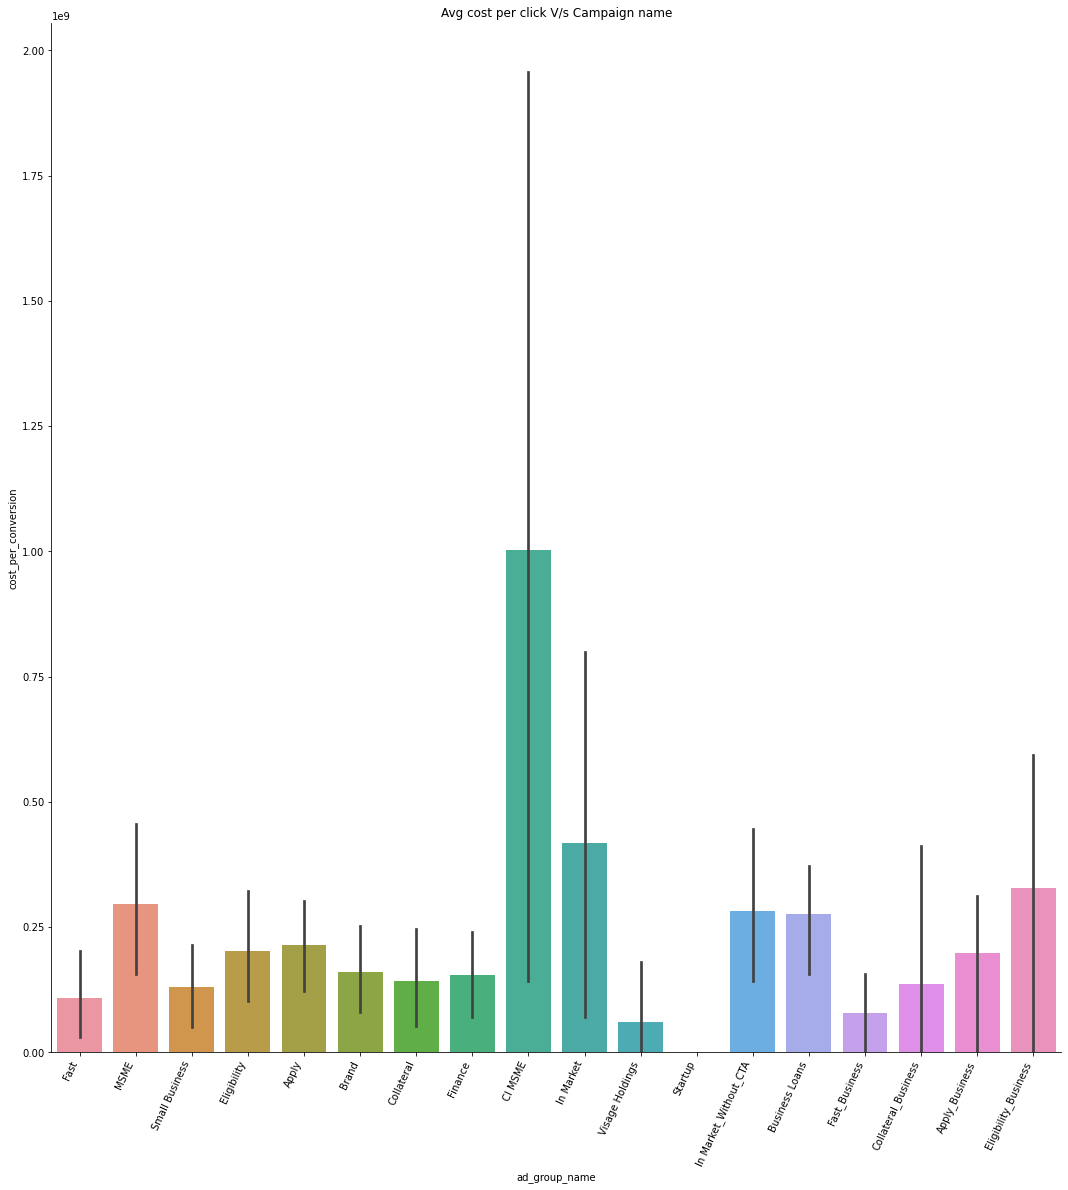

In [55]:
sns.catplot(x='ad_group_name',y='cost_per_conversion',data=Google_Ads,kind='bar',size=15)
plt.xticks(rotation=65, horizontalalignment='right')
plt.title('Avg cost per click V/s Campaign name')
plt.show()

Cost per conversion is very high for ad group name CI MSME and very low for visage holding.

Cost per conversion is zero for start up group.

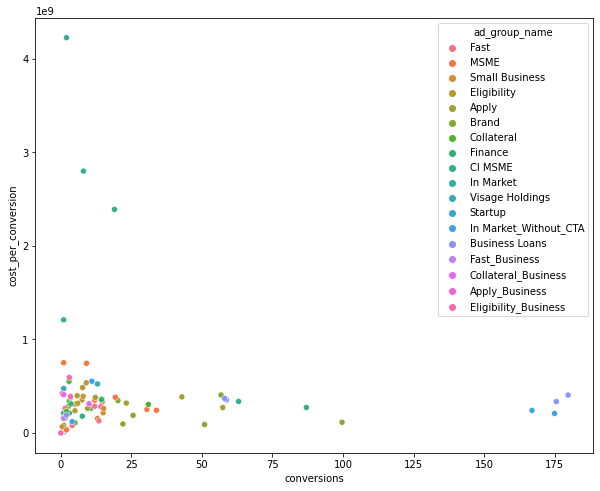

In [56]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='conversions',y='cost_per_conversion',hue='ad_group_name',data=Google_Ads)
plt.show()

conversions for Buisness loans,Fast buisness startup and visage holdings is quite high but cost cost per conversion is lowest for these.

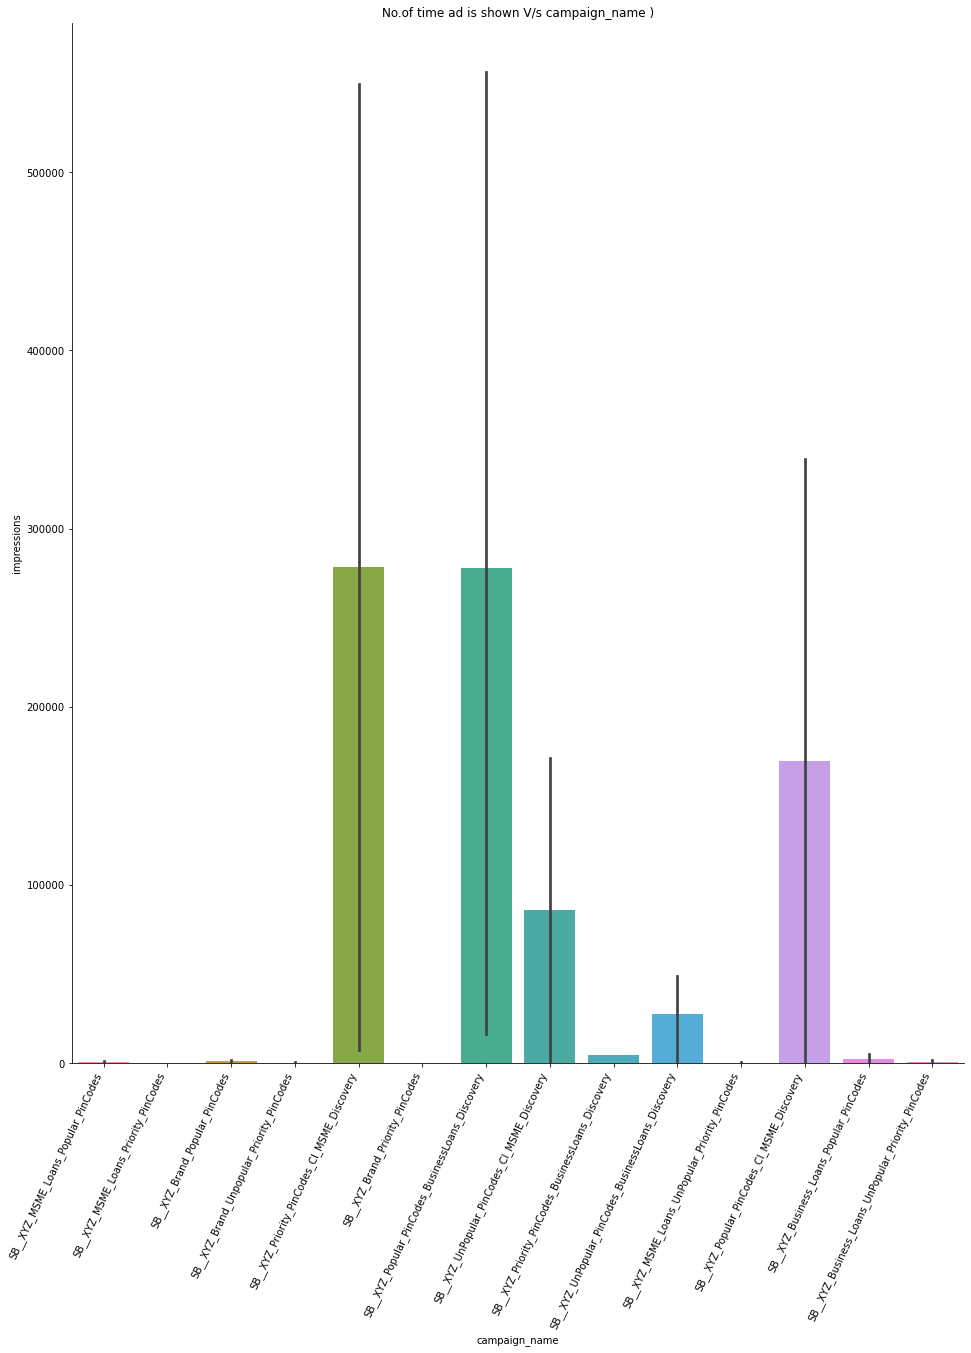

In [69]:
sns.catplot(y='impressions',x='campaign_name',data=Google_Ads,kind='bar',size=15)
plt.xticks(rotation=65, horizontalalignment='right')
plt.title('No.of time ad is shown V/s campaign_name )')
plt.show()

SB_XYZ_Priority_Pincodes_CI_MSME_Discovery and SB_XYZ_Priority_Pincodes_BuisnessLoans_Discovery have highest impressions of all the campaign.

<Figure size 720x720 with 0 Axes>

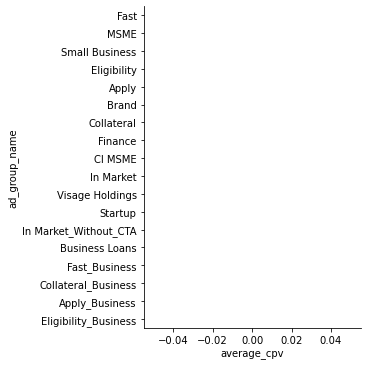

In [61]:
plt.figure(figsize=(10,10))
sns.catplot(x='average_cpv',y='ad_group_name',data=Google_Ads,kind='bar')
plt.show()

Cost per view is nill(0) fro all the ad groups

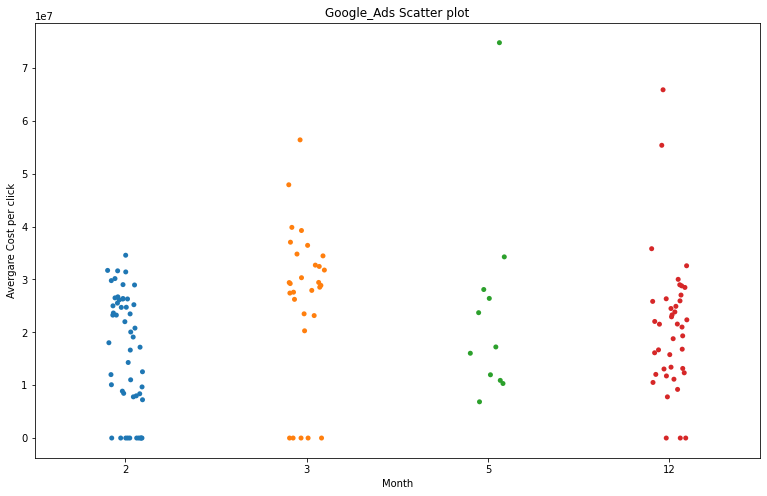

In [71]:
plt.figure(figsize=(13,8))
ax=sns.stripplot(Google_Ads['Month-camp-start'],Google_Ads['average_cpc'])
ax.set(xlabel='Month',ylabel='Avergare Cost per click')
plt.title('Google_Ads Scatter plot')
plt.show()

Average cost per click is ranging from 0 to 4 (X10^7)for the campaings started in month of feb.